# Solving Traveling Salesman Problem Using Genetic Algorithms

This code implements a genetic algorithm to solve the Travelling Salesman Problem (TSP). The TSP is an optimization problem where the goal is to find the shortest possible route that goes through a list of cities and returns to the original city. The code uses a number of genetic algorithm operations (e.g., selection, crossover, and mutation) to gradually improve a population of solutions.

Here is an overview of what the code does:

- City:This is a class that represents a city with x and y coordinates. It has a method to compute the Euclidean distance to another city.
- calculate_distance: This function calculates the total distance of a route. A route is a sequence of cities.
- create_initial_population: This function creates an initial population of random routes.
- tournament_selection: This function performs tournament selection, which is a method of selecting individuals from the current population for reproduction. It randomly selects a subset of individuals and returns the one with the shortest route.
- order_crossover: This function performs order crossover, which is a method of combining two parent routes to create a child route.
- swap_mutation: This function performs swap mutation, which is a method of introducing small random changes into a route.
- plot_cities: This function plots the cities in a given route.
- geneticAlgorithmPlot: This is the main function where the genetic algorithm process is implemented. It creates an initial population, and then for a specified number of generations, it performs selection, crossover, and mutation to create a new population. It also plots the shortest distance found in each generation.
- the function geneticAlgorithmPlot() executes a single run of the genetic algorithm for 300 generations.It starts by creating an initial population of routes (each route is a different solution to the problem), and it iteratively applies the selection, crossover, and mutation operators over the course of the specified number of generations (300 in this case).The results are collected and plotted, showing how the best (shortest) distance changes over each generation. This is just a single run, meaning the process is executed from start to finish one time.

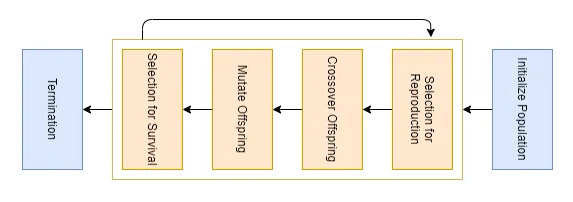

Initial shortest distance:  872.5732782826942


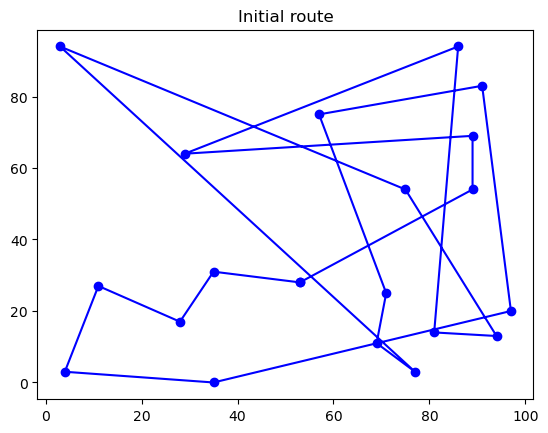

Final shortest distance:  514.843947022949


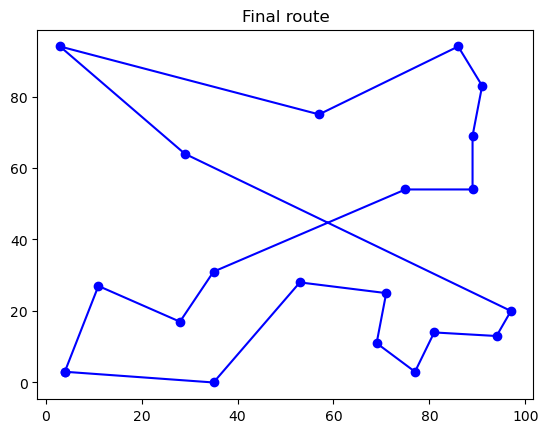

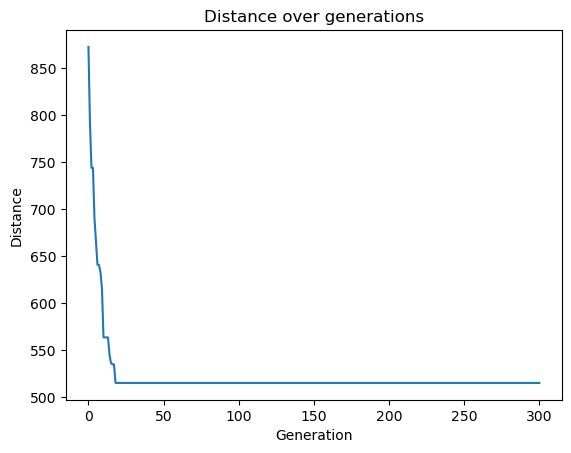

Improvement:  357.7293312597452


In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

# This class represents a city with x, y coordinates
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # Compute Euclidean distance(Pythagorean theorem) between two cities
    #The expression self.x - city.x calculates the difference in x-coordinates between the current city and
    #the other city (city). Taking the absolute value (abs) ensures that the difference is positive.
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    # In the City class, the __repr__ method is overridden to provide a string representation
    # of a City object. It returns the coordinates of the city in the format (x,y), where x
    # is the x-coordinate and y is the y-coordinate. This allows for a more readable display
    # of City objects when printed or used in string contexts.
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

# Fitness function: Computes total distance of a given route (sequence of cities)
def calculate_distance(route):
    return sum([route[i].distance(route[i + 1])
                
                for i in range(len(route) - 1)]) + route[-1].distance(route[0])

# Initialization step: Create an initial population of random routes
def create_initial_population(population_size, cities):
    return [random.sample(cities, len(cities))
            
            for _ in range(population_size)]

# Selection step: Perform tournament selection by randomly selecting a subset of individuals and returning the best one
def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return min(tournament, key=calculate_distance)

# Crossover step: Perform order crossover between two parents to create a child route
def order_crossover(parent1, parent2):
    child = [None] * len(parent1)
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child[start:end] = parent1[start:end]

    filled = end - start
    pointer1, pointer2 = end, end
    while filled < len(parent1):
        if pointer1 >= len(parent1):
            pointer1 = 0
        if pointer2 >= len(parent1):
            pointer2 = 0
        if parent2[pointer2] not in child:
            if pointer1 < len(child):
                child[pointer1] = parent2[pointer2]
                pointer1 += 1
                filled += 1
        pointer2 += 1
    return child

# Mutation step: Perform swap mutation on a given route with a given mutation rate
def swap_mutation(route, mutation_rate):
    new_route = route.copy()
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Plotting function: Plot the cities in a given route
def plot_cities(route, title):
    route = route + [route[0]]  # Connect the last city back to the first city
    X = [city.x for city in route]
    Y = [city.y for city in route]
    plt.figure()
    plt.plot(X, Y, 'b-', marker='o')
    plt.title(title)
    plt.show()


# Set a seed for the random number generator
random.seed(42)

# Main GA function: Implement the GA process with the specified parameters
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    # Create the initial population
    initial_population = create_initial_population(popSize, population)
    
    # Save initial shortest distance
    initial_route = min(initial_population, key=calculate_distance)
    initial_distance = calculate_distance(initial_route)
    print("Initial shortest distance: ", initial_distance)
    plot_cities(initial_route, 'Initial route')
    
    # List to store distances
    distances = [initial_distance]
    
    # Main loop to perform GA operations
    for generation in range(generations):
        new_population = []
        # Perform selection and store the selected individuals in the new population
        for _ in range(eliteSize):
            new_population.append(tournament_selection(initial_population, eliteSize))
        # Perform crossover and mutation to generate the rest of the new population
        for _ in range(popSize - eliteSize):
            parent1 = tournament_selection(initial_population, eliteSize)
            parent2 = tournament_selection(initial_population, eliteSize)
            child = order_crossover(parent1, parent2)
            child = swap_mutation(child, mutationRate)
            new_population.append(child)
        initial_population = new_population
        # Save shortest distance for this generation
        distances.append(calculate_distance(min(initial_population, key=calculate_distance)))
        
    # After all generations, output the best route and its distance
    final_route = min(initial_population, key=calculate_distance)
    final_distance = calculate_distance(final_route)
    print("Final shortest distance: ", final_distance)
    plot_cities(final_route, 'Final route')
    
    # Plot the distances over generations
    plt.figure()
    plt.plot(distances)
    plt.title('Distance over generations')
    plt.xlabel('Generation')
    plt.ylabel('Distance')
    plt.show()
    print("Improvement: ", initial_distance - final_distance)

# Create a list of cities
cityList = [City(random.randint(0, 100), random.randint(0, 100)) for _ in range(20)]

# Run the genetic algorithm with specified parameters
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.1, generations=300)


## Mutation Rate vs Convergence

+ This is an experiment to investigate the impact of different mutation rates on the convergence of the genetic algorithm for solving the Traveling Salesman Problem (TSP). The main goal is to observe how varying mutation rates affect the improvement in the total distance traveled over generations.

+ The distances list contains the total distance traveled by the best route found by the genetic algorithm at each generation, starting from the initial population and iterating through the specified number of generations.

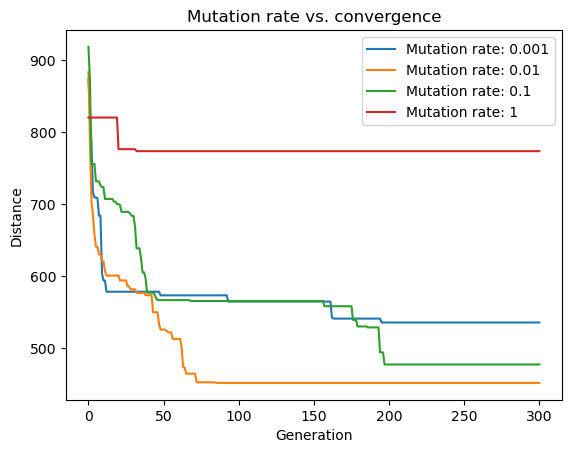

In [5]:
import random
def geneticAlgorithmPlotVaryingMutation(population, popSize, eliteSize, mutationRate, generations):
    initial_population = create_initial_population(popSize, population)
    distances = [calculate_distance(min(initial_population, key=calculate_distance))]
    
    for generation in range(generations):
        new_population = []
        for _ in range(eliteSize):
            new_population.append(tournament_selection(initial_population, eliteSize))
        for _ in range(popSize - eliteSize):
            parent1 = tournament_selection(initial_population, eliteSize)
            parent2 = tournament_selection(initial_population, eliteSize)
            child = order_crossover(parent1, parent2)
            child = swap_mutation(child, mutationRate)
            new_population.append(child)
        initial_population = new_population
        shortest_distance = calculate_distance(min(initial_population, key=calculate_distance))
        distances.append(shortest_distance)
    
    return distances


# Set a seed for the random number generator
random.seed(42)

# Create a list of cities
cityList = [City(random.randint(0, 100), random.randint(0, 100)) for _ in range(20)]

mutation_rates = [0.001, 0.01, 0.1, 1]
generations = 300

plt.figure()

for mutation_rate in mutation_rates:
    distances = geneticAlgorithmPlotVaryingMutation(cityList, popSize=100, eliteSize=20, mutationRate=mutation_rate, generations=generations)
    plt.plot(distances, label=f"Mutation rate: {mutation_rate}")

plt.title('Mutation rate vs. convergence')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.legend()
plt.show()


## Population Size vs Convergence

+ This is an experiment to investigate the impact of different population sizes on the convergence of the genetic algorithm for solving the Traveling Salesman Problem (TSP). The main goal is to observe how varying population sizes affect the improvement in the total distance traveled over generations.


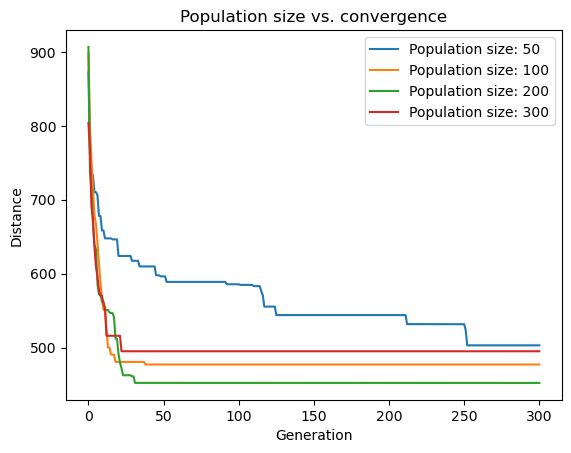

In [6]:
# Set a seed for the random number generator
random.seed(42)

population_sizes = [50, 100, 200,300]
mutation_rate = 0.01
generations = 300

plt.figure()

for pop_size in population_sizes:
    distances = geneticAlgorithmPlotVaryingMutation(cityList, popSize=pop_size, eliteSize=int(pop_size*0.2), mutationRate=mutation_rate, generations=generations)
    plt.plot(distances, label=f"Population size: {pop_size}")

plt.title('Population size vs. convergence')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.legend()
plt.show()

## Elite Size vs Convergence

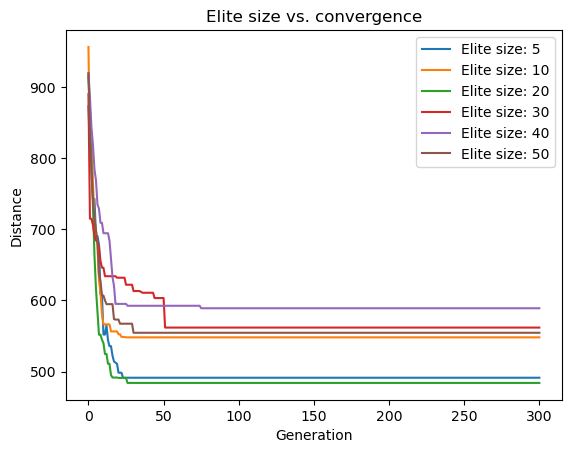

In [11]:
# Set a seed for the random number generator
random.seed(42)

elite_sizes = [5, 10, 20, 30, 40, 50]
mutation_rate = 0.01
generations = 300

plt.figure()

for elite_size in elite_sizes:
    distances = geneticAlgorithmPlotVaryingMutation(cityList, popSize=100, eliteSize=elite_size, mutationRate=mutation_rate, generations=generations)
    plt.plot(distances, label=f"Elite size: {elite_size}")

plt.title('Elite size vs. convergence')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.legend()
plt.show()


## Stochastic Behavior of Genetic Algorithm in Solving TSP

+ Implements a modified version of the genetic algorithm to solve the Traveling Salesman Problem (TSP).
+ Executes the genetic algorithm multiple times (500 trials) with the same set of cities to observe its stochastic behavior.
+ Stores the improvement in the total distance achieved by the GA in each trial.
+ Conducts a statistical analysis of the improvements, calculating the mean, standard deviation, minimum, and maximum of the improvements.
+ Plots the distribution of the improvements using a histogram, along with a fitted normal distribution curve based on the mean and standard deviation.


Run 1:
Initial shortest distance:  872.5732782826942
Final shortest distance:  467.04862870426115
Improvement:  405.52464957843307
Run 2:
Initial shortest distance:  861.1367511258026
Final shortest distance:  543.7589488880009
Improvement:  317.3778022378017
Run 3:
Initial shortest distance:  870.023978808179
Final shortest distance:  469.32246483106786
Improvement:  400.7015139771111
Run 4:
Initial shortest distance:  921.0590113473329
Final shortest distance:  514.5734750939426
Improvement:  406.48553625339025
Run 5:
Initial shortest distance:  936.5191076321585
Final shortest distance:  520.246156030733
Improvement:  416.27295160142546
Run 6:
Initial shortest distance:  948.0362428138004
Final shortest distance:  520.7422357712272
Improvement:  427.2940070425732
Run 7:
Initial shortest distance:  913.2306492097837
Final shortest distance:  495.8798398258252
Improvement:  417.3508093839585
Run 8:
Initial shortest distance:  956.6208262304989
Final shortest distance:  458.80986018255

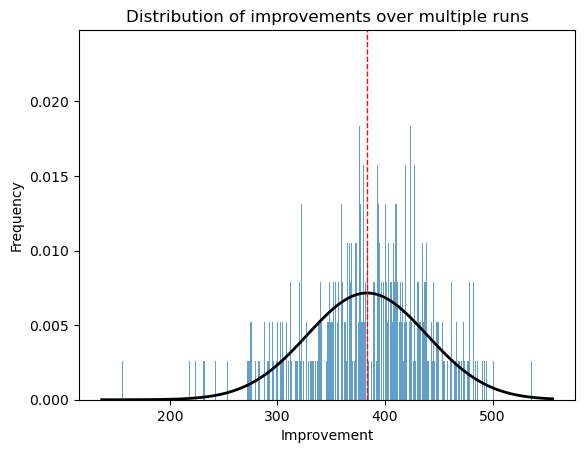

In [10]:
import scipy.stats as stats

# Modified GA function to return the improvement
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    # Create the initial population
    initial_population = create_initial_population(popSize, population)
    
    # Save initial shortest distance
    initial_route = min(initial_population, key=calculate_distance)
    initial_distance = calculate_distance(initial_route)
    print("Initial shortest distance: ", initial_distance)
    
    # List to store distances
    distances = [initial_distance]
    
    # Main loop to perform GA operations
    for generation in range(generations):
        new_population = []
        # Perform selection and store the selected individuals in the new population
        for _ in range(eliteSize):
            new_population.append(tournament_selection(initial_population, eliteSize))
        # Perform crossover and mutation to generate the rest of the new population
        for _ in range(popSize - eliteSize):
            parent1 = tournament_selection(initial_population, eliteSize)
            parent2 = tournament_selection(initial_population, eliteSize)
            child = order_crossover(parent1, parent2)
            child = swap_mutation(child, mutationRate)
            new_population.append(child)
        initial_population = new_population
        # Save shortest distance for this generation
        distances.append(calculate_distance(min(initial_population, key=calculate_distance)))
        
    # After all generations, output the best route and its distance
    final_route = min(initial_population, key=calculate_distance)
    final_distance = calculate_distance(final_route)
    print("Final shortest distance: ", final_distance)
    
    improvement = initial_distance - final_distance
    print("Improvement: ", improvement)
    
    return improvement  # Return the improvement

# Set a seed for the random number generator
random.seed(42)

# Create a list of cities
# Number of cities = 20 (Could have been higher but computational power needed grows exponentially)
cityList = [City(random.randint(0, 100), random.randint(0, 100)) for _ in range(20)]

# Run the genetic algorithm with specified parameters multiple times without setting the seed
improvements = []
num_trials = 500
for i in range(num_trials):
    print(f"Run {i+1}:")
    improvement = geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=300)
    improvements.append(improvement)

# Perform statistical analysis
mean_improvement = np.mean(improvements)
std_dev_improvement = np.std(improvements)
min_improvement = np.min(improvements)
max_improvement = np.max(improvements)

print(f"Mean of improvements: {mean_improvement}")
print(f"Standard deviation of improvements: {std_dev_improvement}")
print(f"Minimum of improvements: {min_improvement}")
print(f"Maximum of improvements: {max_improvement}")

# Plot the distribution of improvements
plt.figure()
plt.hist(improvements, bins= 500, alpha=0.7, rwidth=0.85, density=True)  # Use a fixed number of bins and normalize to form a probability density

# Plot a normal distribution with the mean and standard deviation of the improvements
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_improvement, std_dev_improvement)
plt.plot(x, p, 'k', linewidth=2)

# Add a vertical line at the mean
plt.axvline(mean_improvement, color='red', linestyle='dashed', linewidth=1)

plt.xlabel('Improvement')
plt.ylabel('Frequency')
plt.title('Distribution of improvements over multiple runs')
plt.show()


+ $ Improvements: $ This is a list that stores the improvement in the total distance achieved by the genetic algorithm in each trial. The improvement is calculated as the difference between the initial shortest distance and the final shortest distance obtained by the GA in each run.

+ $ Mean-of-improvements: $ This is the mean of the improvements calculated over all the trials. It represents the average improvement in the total distance achieved by the GA across all runs. A higher mean improvement indicates that the GA is consistently finding better solutions.

+ $ Standard-deviation-of-improvements :$ This is the standard deviation of the improvements. It quantifies the spread or variability of the improvements. A larger standard deviation suggests that the GA's performance varies significantly across runs, while a smaller standard deviation indicates more consistent results.

+ The positive mean improvement of 383 indicates that the genetic algorithm, on average, is producing better solutions than the initial solution.
+ The standard deviation of 55 suggests that the individual improvements vary from the mean improvement of 383 by approximately 55 units on average. A larger standard deviation indicates more variability in the improvements obtained from each run.

+ The histogram plot displays the distribution of improvements across all runs, providing a visual representation of how frequently certain improvement values are observed. The fitted normal distribution curve provides an approximation of the overall distribution, and the red dashed line represents the mean improvement. If the histogram closely resembles the normal curve, it indicates that the improvements follow a normal distribution pattern, which can be helpful for further analysis and understanding the behavior of the GA. However, if the histogram exhibits a skewed or non-normal distribution, it suggests that the GA's performance is more complex and influenced by other factors.